In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
# Load dataset
file_path = "Employee.csv"  # Update with actual file path
df = pd.read_csv(file_path)

In [3]:
# Data Exploration
print("Dataset Info:\n", df.info())
print("\nFirst 5 Rows:\n", df.head())
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

print("\nSummary Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
Dataset Info:
 None

First 5 Rows:
    Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0

Unique Values in Each Column:
Company: 6
Age: 29
Salary: 40
Place: 11
Country: 1
Gender: 2

Summary Statistics:
               Age       Salary      Gender
count  130.000000   124.000000 

In [5]:
# Data Cleaning
# Find and replace age=0 with NaN
df.loc[df['Age'] == 0, 'Age'] = np.nan

In [6]:
# Check missing values
print("\nMissing Values Before Treatment:\n", df.isnull().sum())


Missing Values Before Treatment:
 Company     8
Age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [7]:
# Fill missing values with mean/median/mode
df.fillna(df.median(numeric_only=True), inplace=True)
print("\nMissing Values After Treatment:\n", df.isnull().sum())


Missing Values After Treatment:
 Company     8
Age         0
Salary      0
Place      14
Country     0
Gender      0
dtype: int64


In [8]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
# Outlier Detection using IQR (Only Numeric Columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

In [11]:
# Data Analysis
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

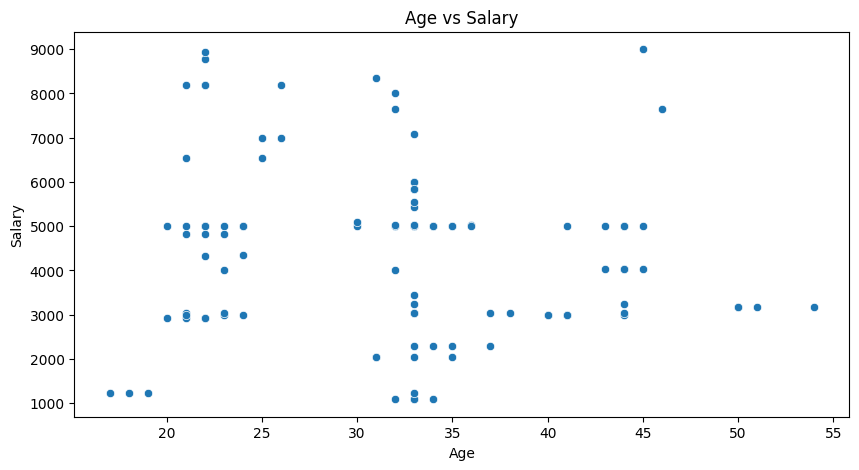

In [12]:
# Plot Age vs Salary
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Age'], y=df['Salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()

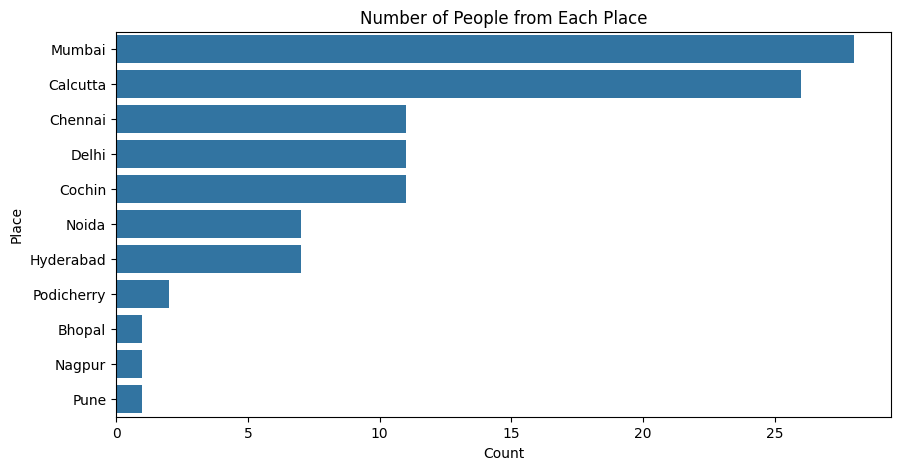

In [13]:
# Count of people per place
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Place'], order=df['Place'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Place")
plt.title("Number of People from Each Place")
plt.show()

In [14]:
# Data Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

C:\Users\aoa\AppData\Local\Temp\ipykernel_7228\2368173129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\aoa\AppData\Local\Temp\ipykernel_7228\2368173129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\aoa\AppData\Local\Temp\ipykernel_7228\2368173129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [15]:
# Feature Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [16]:
df_scaled_standard = pd.DataFrame(scaler_standard.fit_transform(df[numeric_cols]), columns=numeric_cols)
df_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df[numeric_cols]), columns=numeric_cols)

In [17]:
print("\nData Preprocessing Completed Successfully!")


Data Preprocessing Completed Successfully!
